In [8]:
import pandas as pd
import numpy as np
from regimeSignal import regimeSignalModel
from Miscellaneous import Plot, FetchData
from pypfopt import expected_returns, risk_models
import datetime
from dateutil import relativedelta
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
tickers = ["ABM", "ABC", "BRO"]
data = FetchData().test_set(ticker=tickers, startDate="2008-01-01", endDate="2014-12-31")
#data.resample('1M').mean()
data.index = data.index.to_period('D')
data

...Data for ['ABM', 'ABC', 'BRO'] from 2008-01-01 to 2014-12-31 loaded successfully


ticker,ABC,ABM,BRO
date,,,
2008-01-02,44.55,20.20,23.40
2008-01-03,44.82,19.46,23.28
2008-01-04,43.80,19.30,23.31
2008-01-07,44.38,19.48,23.19
2008-01-08,45.65,19.05,22.58
...,...,...,...
2014-12-24,91.60,29.03,32.76
2014-12-26,91.51,29.21,32.62
2014-12-29,91.63,29.37,33.16


In [ ]:
regimeSignals = pd.Series(data=[item-1 for item in np.random.choice(3, len(data.resample('1M').mean()), replace=True)],index=data.resample('1M').mean().index)
regimeSignals = regimeSignals[2:]
regimeSignals

In [ ]:
RSModel = regimeSignalModel(regimeSignals, data)

In [ ]:
RSModel.getWeights(verbose=False)

In [ ]:
RSModel.regimeWeights

In [ ]:
print(np.sum(list(wts[1].values())),np.sum(list(wts[-1].values())),np.sum(list(wts[0].values())))
wts

In [36]:
import yfinance as yf
VIX = yf.download("^VIX", start='2008-01-01', end='2014-12-31', interval='1mo')
VIX.index = pd.to_datetime(VIX.index)

[*********************100%***********************]  1 of 1 completed


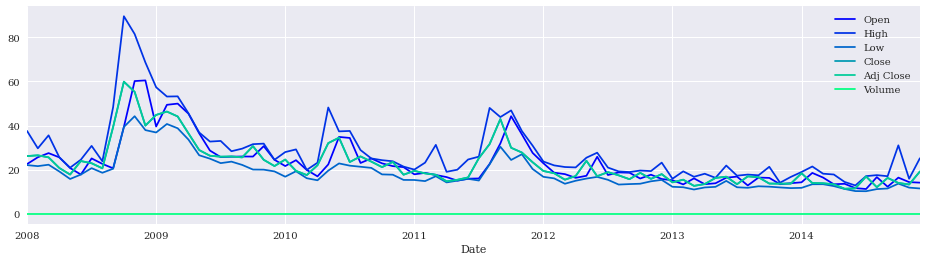

In [37]:
VIX.plot(figsize=(16,4), cmap='winter');

In [38]:
from sklearn.mixture import GaussianMixture
df = VIX['Adj Close'].values.reshape(-1, 1)
gmm = GaussianMixture(n_components=3)
gmm.fit(df)
labels = gmm.predict(df)
u_labels = np.unique(labels)

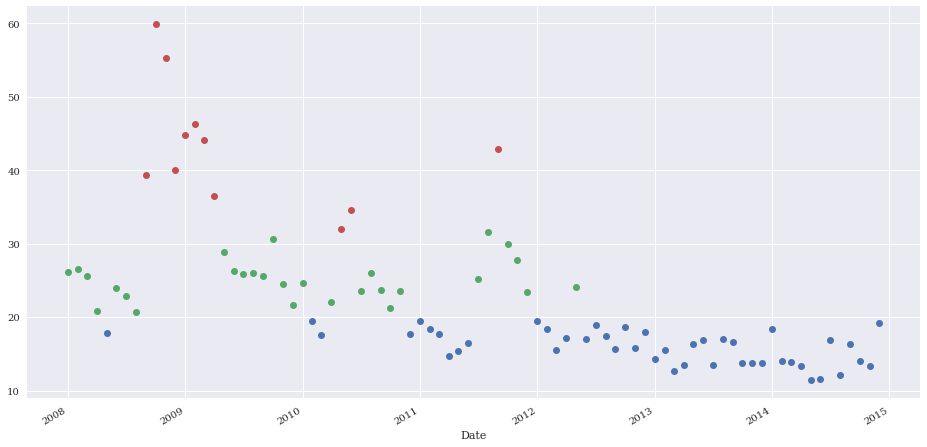

In [41]:
import matplotlib.pyplot as plt

fig, ax=  plt.subplots()

regimes_df = pd.DataFrame(data = {'VIX': VIX['Adj Close'], 'Regime': labels}, index=VIX.index)

for regimes in regimes_df.Regime.value_counts().index.tolist():
    regimes_df.VIX[regimes_df.Regime == regimes].plot(figsize=(16, 8), ax=ax, marker='o', ls="")

plt.show()

In [42]:
data

ticker,ABC,ABM,BRO
date,,,
2008-01-02,44.55,20.20,23.40
2008-01-03,44.82,19.46,23.28
2008-01-04,43.80,19.30,23.31
2008-01-07,44.38,19.48,23.19
2008-01-08,45.65,19.05,22.58
...,...,...,...
2014-12-24,91.60,29.03,32.76
2014-12-26,91.51,29.21,32.62
2014-12-29,91.63,29.37,33.16


In [81]:
LOOKBACK_MONTHS = 3
regimeSignals = regimes_df.Regime
# regimeSignals.index = regimeSignals.index.to_period('M')

trainingData = []

for signal in regimeSignals.index.tolist()[LOOKBACK_MONTHS:]:
    
    regime = regimeSignals.loc[signal]
    mask = regimeSignals.index[regimeSignals == regime]#[-LOOKBACK_MONTHS:]
    
    df = pd.DataFrame()
    
#     print("\n")
#     print(mask)
#     print(f"The Regime on Month {signal} was {regime} and the mask chosen for the same was:")
#     print(mask[:LOOKBACK_MONTHS])
    
    for month in mask.tolist():
        
        if month > signal:
            continue
        
        df = pd.concat([df, data.loc[str(month)]], axis=0, join='outer')
    trainingData.append(df)


In [82]:
trainingData

ticker,ABC,ABM,BRO
date,,,
2008-09-02,41.32,26.17,20.65
2008-09-03,41.32,27.39,21.17
2008-09-04,40.99,25.93,20.78
2008-09-05,40.55,21.12,21.75
2008-09-08,41.52,21.15,21.46
...,...,...,...
2010-06-24,31.59,21.95,19.71
2010-06-25,31.87,22.37,19.79
2010-06-28,32.53,22.20,19.81


In [80]:
regimeSignals[:25]

Date
2008-01    2
2008-02    2
2008-03    2
2008-04    2
2008-05    0
2008-06    2
2008-07    2
2008-08    2
2008-09    1
2008-10    1
2008-11    1
2008-12    1
2009-01    1
2009-02    1
2009-03    1
2009-04    1
2009-05    2
2009-06    2
2009-07    2
2009-08    2
2009-09    2
2009-10    2
2009-11    2
2009-12    2
2010-01    2
Freq: M, Name: Regime, dtype: int32

In [112]:
tickers = ["ABM", "ABC", "BRO"]
data = FetchData().test_set(ticker=tickers, startDate="2010-01-01", endDate="2011-12-31")
data.head()

...Data for ['ABM', 'ABC', 'BRO'] from 2010-01-01 to 2011-12-31 loaded successfully


ticker,ABC,ABM,BRO
date,,,
2010-01-04,26.63,21.26,18.01
2010-01-05,26.44,20.97,17.88
2010-01-06,26.19,20.97,17.72
2010-01-07,25.77,21.24,17.73
2010-01-08,26.05,21.22,17.64


In [113]:
regimeSignals = pd.Series(labels, index = VIX.index)
regimeSignals = regimeSignals[2:]
regimeSignals.head()

Date
2010-03-01    1
2010-04-01    0
2010-05-01    2
2010-06-01    2
2010-07-01    0
dtype: int32

In [119]:
model = regimeSignalModel(regimeSignals, data)

...Data for USTREASURY/YIELD.3 from 2010-01-04 to 2010-03-01 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-01-04 to 2010-04-01 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-02-01 to 2010-04-30 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-03-01 to 2010-06-01 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-04-01 to 2010-07-01 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-05-03 to 2010-07-30 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-06-01 to 2010-09-01 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-07-01 to 2010-10-01 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-08-02 to 2010-11-01 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-09-01 to 2010-12-01 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-10-01 to 2010-12-31 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-11-01 to 2011-02-01 loaded successfully
...Data for USTREASURY/YIELD

In [120]:
model.getWeights(verbose=True)

Max Sharpe Optimisation

 Training dates 2010-01-04 00:00:00 2010-03-01 00:00:00

 Regime Signal dates 2010-03-01 00:00:00

 Risk-free rate 0.09

 {'ABC': 0.7777777777777779, 'ABM': 0.1111111111111111, 'BRO': 0.1111111111111111} 

Custom: Maximum 15.0% volatility

 Training dates 2010-01-04 00:00:00 2010-04-01 00:00:00

 Regime Signal dates 2010-04-01 00:00:00

 Risk-free rate 0.11

 {'ABC': 0.7601452102615189, 'ABM': 0.1274549958253238, 'BRO': 0.1123997939130726} 

Minimum Volatility Optimisation

 Training dates 2010-02-01 00:00:00 2010-04-30 00:00:00

 Regime Signal dates 2010-05-01 00:00:00

 Risk-free rate 0.14

 {'ABC': 0.3333333333333334, 'ABM': 0.3333333333333334, 'BRO': 0.3333333333333334} 

Minimum Volatility Optimisation

 Training dates 2010-03-01 00:00:00 2010-06-01 00:00:00

 Regime Signal dates 2010-06-01 00:00:00

 Risk-free rate 0.16

 {'ABC': 0.3705714762950188, 'ABM': 0.1111111111111111, 'BRO': 0.5183174125938701} 

Custom: Maximum 15.0% volatility

 Training dates 2

In [121]:
model.weightsList

{0: [{'ABC': 0.7601452102615189,
   'ABM': 0.1274549958253238,
   'BRO': 0.1123997939130726},
  {'ABC': 0.3987938882183361,
   'ABM': 0.1111111111111111,
   'BRO': 0.4900950006705527},
  {'ABC': 0.3836558996109062,
   'ABM': 0.1111111111111111,
   'BRO': 0.5052329892779828},
  {'ABC': 0.3762598252754034,
   'ABM': 0.1111111111111111,
   'BRO': 0.5126290636134855},
  {'ABC': 0.3720875837491038,
   'ABM': 0.1544063057067788,
   'BRO': 0.4735061105441173},
  {'ABC': 0.386796337527946,
   'ABM': 0.1111111111111111,
   'BRO': 0.5020925513609429},
  {'ABC': 0.7777777777378957,
   'ABM': 0.1111111111267904,
   'BRO': 0.1111111111353316},
  {'ABC': 0.7777777777777778,
   'ABM': 0.1111111111111111,
   'BRO': 0.1111111111111111}],
 1: [{'ABC': 0.7777777777777779,
   'ABM': 0.1111111111111111,
   'BRO': 0.1111111111111111},
  {'ABC': 0.1660825357828014,
   'ABM': 0.1213735558813464,
   'BRO': 0.7125439083358522},
  {'ABC': 0.1827915461826023,
   'ABM': 0.3456656405353722,
   'BRO': 0.471542813282